In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from typing import TypedDict
from dotenv import load_dotenv
import tqdm as notebook_tqdm
from IPython.display import Markdown
load_dotenv()

True

In [26]:
class BatsmanState(TypedDict):

    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundary_per: float
    summary: str
    

In [36]:
def cal_sr(state: BatsmanState) -> BatsmanState:
    sr = 100 * state['runs']/state['balls']
    

    return {'sr':sr}

In [37]:
def cal_bpb(state: BatsmanState) -> BatsmanState:

    bpb = state['balls']/(state['fours'] + state['sixes'])


    return {'bpb':bpb}

In [38]:
def cal_boundary_per(state: BatsmanState) -> BatsmanState:

    boundary_per = 100 * ((state['fours'] * 4) + (state['sixes'] * 6))/state['runs']


    return {'boundary_per': boundary_per}

In [50]:
def summary(state: BatsmanState) -> BatsmanState:

    summary = f"""
Strike Rate : {state['sr']}\n
Balls per boundary : {state['bpb']}\n
Boundary percent : {state['boundary_per']}
"""
    return {'summary':summary}

In [51]:
graph = StateGraph(BatsmanState)

In [52]:
graph.add_node('cal_sr', cal_sr)
graph.add_node('cal_bpb', cal_bpb)
graph.add_node('cal_boundary_per', cal_boundary_per)
graph.add_node('summary', summary)


In [53]:
# edges

graph.add_edge(START, 'cal_sr')
graph.add_edge(START, 'cal_bpb')
graph.add_edge(START, 'cal_boundary_per')

graph.add_edge('cal_sr', 'summary')
graph.add_edge('cal_bpb', 'summary')
graph.add_edge('cal_boundary_per', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()


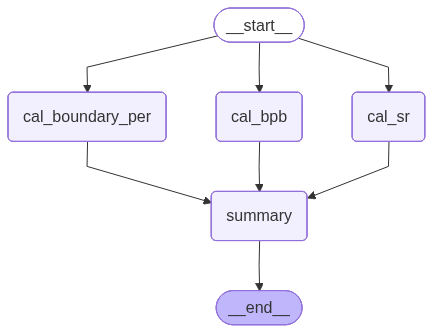

In [54]:
workflow

In [55]:
initial_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}

final_state = workflow.invoke(initial_state)

In [56]:
final_state

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_per': 48.0,
 'summary': '\nStrike Rate : 200.0\n\nBalls per boundary : 5.0\n\nBoundary percent : 48.0\n'}

In [59]:
Markdown(final_state['summary'])


Strike Rate : 200.0

Balls per boundary : 5.0

Boundary percent : 48.0
